In [16]:
from typing import NamedTuple

import matplotlib.pyplot as plt
import numpy as np
import utils

## Day 5: Hydrothermal Venture

[#](https://adventofcode.com/2021/day/5) Beware vents! We have a lost of coordinates which give us the start and ending points of gas vents. For part one we only consider horizontal and vertical vents, ignoring the diag ones.

Notes:

* top left corner is `0,0`
* each position on the grid shows the number of overlapping lines at that point
* The dangerous points to avoid is where 2 or more lines overlap.

Return the number of such overlaps.

In [207]:
test: str = """0,9 -> 5,9
8,0 -> 0,8
9,4 -> 3,4
2,2 -> 2,1
7,0 -> 7,4
6,4 -> 2,0
0,9 -> 2,9
3,4 -> 1,4
0,0 -> 8,8
5,5 -> 8,2
"""

raw_inp = utils.get_input(5, splitlines=False)

Parsing the input into lines and making a blank grid to use later:

In [228]:
class Line(NamedTuple):
    x: int
    y: int
    x2: int
    y2: int


def parse(inp=test, verbose=False):
    lines = []
    largest_num = 0

    for row in inp.splitlines():
        start, end = ([int(r) for r in r.split(",")] for r in row.split(" -> "))
        if max(start + end) > largest_num:
            largest_num = max(start + end)
        line = Line(*(start + end))
        lines.append(line)

    grid = np.zeros((largest_num + 1, largest_num + 1), dtype=int)

    return grid, lines


grid, lines = parse()
print(lines[0:2])
print(grid)

[Line(x=0, y=9, x2=5, y2=9), Line(x=8, y=0, x2=0, y2=8)]
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


Small helper functions to make the solution more readable:

In [210]:
def get_range(points):
    """returns sorted range of ints b/w two two points, including the end"""
    x, y = sorted(points)
    return np.arange(x, y + 1)


get_range([6, 1])

array([1, 2, 3, 4, 5, 6])

Part 1 doesn't ask for diagonal points, but of course they will ask for those in part 2, so building it in:

In [284]:
def get_points(line, diagonal=False):
    """returns all integer points on a line"""

    xs = get_range((line.x, line.x2))
    ys = get_range((line.y, line.y2))

    if line.x == line.x2:
        return [(y, line.x) for y in ys]
    elif line.y == line.y2:
        return [(line.y, x) for x in xs]
    elif diagonal:
        slope = round((line.y2 - line.y) / (line.x2 - line.x))
        intercept = line.y2 - slope * line.x2

        return [(x, round(x * slope + intercept)) for x in xs]


points = get_points(lines[1])
points[:2]

[(215, 920), (216, 920)]

So this solves both part 1 and 2:

In [286]:
def solve(inp=test, overlap: int = 2, diagonal=False, verbose: bool = False):
    grid, lines = parse(inp)
    for line in lines:
        points = get_points(line, diagonal)
        if points != None:
            for p in points:
                grid[p] += 1

    if verbose:
        print(grid)
    ans = np.sum(grid >= overlap)
    print(f"Part {2 if diagonal else 1}: {ans}")
    return ans


assert solve() == 5
solve(raw_inp)
assert solve(diagonal=True) == 12
solve(raw_inp, diagonal=True)

Part 1: 5
Part 1: 4745
Part 2: 12
Part 2: 18442


18442

A basic plot:

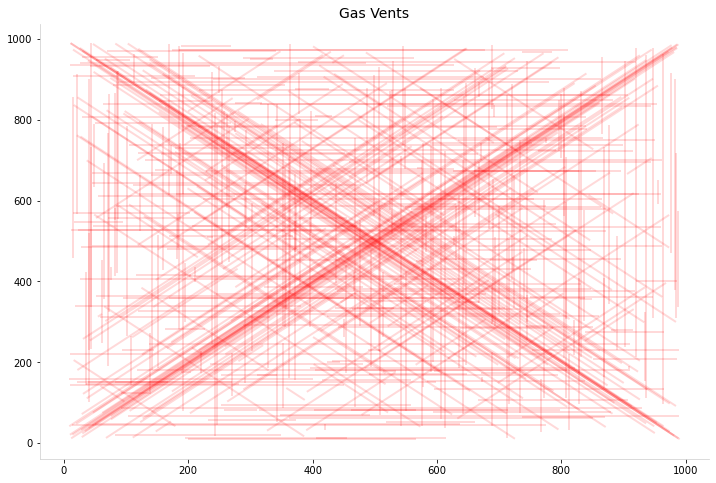

In [287]:
grid, lines = parse(raw_inp)

fig, ax = plt.subplots(figsize=(12, 8))
for line in lines:
    ax.plot((line.x, line.x2), (line.y, line.y2), lw=2, alpha=0.15, color="red")
    step = 1 if line.x >= line.x2 else -1
    xs = np.arange(line.x, line.x2, step=step, dtype=int)
    # print(line.x, line.x2, xs, step)

ax.set_title("Gas Vents")
plt.show()